In [16]:
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

In [5]:
train_data, validation_data, test_data = tfds.load(
    name="imdb_reviews", 
    split=('train[:60%]', 'train[60%:]', 'test'),
    as_supervised=True)

In [6]:
train_data.element_spec
print(train_data.element_spec[0].shape)

()


In [9]:
train_examples_batch, train_labels_batch = tfds.as_numpy(
    next(iter(train_data.batch(10))))
print(train_examples_batch.shape)
print(train_labels_batch.shape)
print(train_examples_batch)
print(train_labels_batch)

(10,)
(10,)
[b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it."
 b'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell asleep because the film was rubbish. The plot d

In [8]:
embedding = "https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim/1"
hub_layer = hub.KerasLayer(embedding, input_shape=[], 
                           dtype=tf.string, trainable=True)
hub_layer(train_examples_batch[:3])

<tf.Tensor: shape=(3, 20), dtype=float32, numpy=
array([[ 1.765786  , -3.882232  ,  3.9134233 , -1.5557289 , -3.3362343 ,
        -1.7357955 , -1.9954445 ,  1.2989551 ,  5.081598  , -1.1041286 ,
        -2.0503852 , -0.72675157, -0.65675956,  0.24436149, -3.7208383 ,
         2.0954835 ,  2.2969332 , -2.0689783 , -2.9489717 , -1.1315987 ],
       [ 1.8804485 , -2.5852382 ,  3.4066997 ,  1.0982676 , -4.056685  ,
        -4.891284  , -2.785554  ,  1.3874227 ,  3.8476458 , -0.9256538 ,
        -1.896706  ,  1.2113281 ,  0.11474707,  0.76209456, -4.8791065 ,
         2.906149  ,  4.7087674 , -2.3652055 , -3.5015898 , -1.6390051 ],
       [ 0.71152234, -0.6353217 ,  1.7385626 , -1.1168286 , -0.5451594 ,
        -1.1808156 ,  0.09504455,  1.4653089 ,  0.66059524,  0.79308075,
        -2.2268345 ,  0.07446612, -1.4075904 , -0.70645386, -1.907037  ,
         1.4419787 ,  1.9551861 , -0.42660055, -2.8022065 ,  0.43727064]],
      dtype=float32)>

In [10]:
model = tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 20)                400020    
                                                                 
 dense (Dense)               (None, 16)                336       
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 400,373
Trainable params: 400,373
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [12]:
history = model.fit(train_data.shuffle(10000).batch(512),
                    epochs=20,
                    validation_data=validation_data.batch(512),
                    verbose=1)

Epoch 1/20
30/30 [==============================] - 4s 78ms/step - loss: 0.7919 - accuracy: 0.5168 - val_loss: 0.6824 - val_accuracy: 0.6009
Epoch 2/20
30/30 [==============================] - 2s 58ms/step - loss: 0.6290 - accuracy: 0.6239 - val_loss: 0.5990 - val_accuracy: 0.6576
Epoch 3/20
30/30 [==============================] - 2s 60ms/step - loss: 0.5676 - accuracy: 0.6812 - val_loss: 0.5577 - val_accuracy: 0.6892
Epoch 4/20
30/30 [==============================] - 2s 59ms/step - loss: 0.5287 - accuracy: 0.7172 - val_loss: 0.5259 - val_accuracy: 0.7249
Epoch 5/20
30/30 [==============================] - 2s 56ms/step - loss: 0.4947 - accuracy: 0.7484 - val_loss: 0.4979 - val_accuracy: 0.7413
Epoch 6/20
30/30 [==============================] - 2s 64ms/step - loss: 0.4629 - accuracy: 0.7742 - val_loss: 0.4712 - val_accuracy: 0.7678
Epoch 7/20
30/30 [==============================] - 2s 74ms/step - loss: 0.4313 - accuracy: 0.7984 - val_loss: 0.4463 - val_accuracy: 0.7862
Epoch 8/20
30

In [13]:
results = model.evaluate(test_data.batch(512), verbose=2)

for name, value in zip(model.metrics_names, results):
  print("%s: %.3f" % (name, value))

print(history.history.keys())

49/49 - 2s - loss: 0.3208 - accuracy: 0.8588 - 2s/epoch - 45ms/step
loss: 0.321
accuracy: 0.859
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [17]:
acc2 = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(20) 

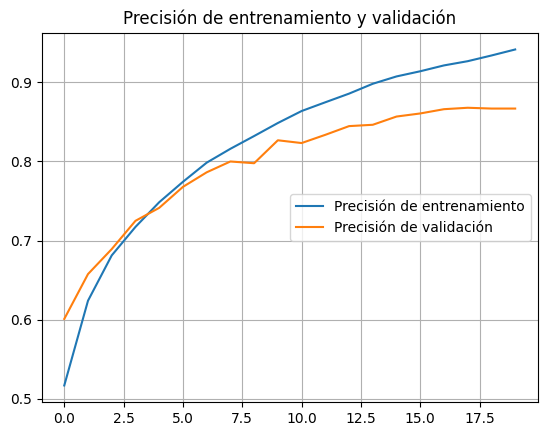

In [18]:
plt.figure()
plt.plot(epochs_range, acc2, label='Precisión de entrenamiento')
plt.plot(epochs_range, val_acc, label='Precisión de validación')
plt.legend(loc='center right')
plt.title('Precisión de entrenamiento y validación')
plt.grid()
plt.show()

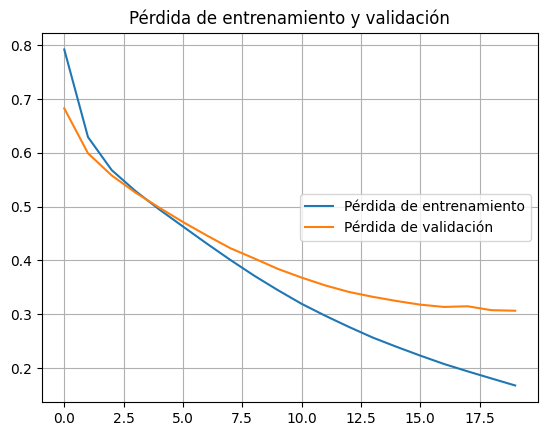

In [19]:
plt.figure()
plt.plot(epochs_range, loss, label='Pérdida de entrenamiento')
plt.plot(epochs_range, val_loss, label='Pérdida de validación')
plt.legend(loc='center right')
plt.title('Pérdida de entrenamiento y validación')
plt.grid()
plt.show()

In [20]:
predecir = model.predict(test_data.batch(512))
predecir2 = np.rint(predecir)

print(predecir2)

49/49 [==============================] - 2s 33ms/step
[[-1.]
 [ 2.]
 [-3.]
 ...
 [-6.]
 [ 4.]
 [ 5.]]
